# FIT5196-S2-2020 assessment 2
#### Student Name: Shubham Singh
#### Student ID: 30145945

Date: 22/10/2020

Version: 2.0

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

The dataset contains transactional retail data from an online electronics store (DigiCO) located in Melbourne, Australia1. ​The store operation is exclusively online, and it has three warehouses around Melbourne from which goods are delivered to customers.

### Information about rows and column of CSV Files
- Total we have `500` rows and `16` columns
- We have 7 `object type` columns
- We have 7 `numeric type` columns
- And 2 `boolean type` columns

### Libraries used as follow:

In [1]:
#Basic scientific python libs
import pandas as pd
import numpy as np
import re
import itertools

import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

# Reading missing dataset 
Dataset contains all the informtion regarding order and there corrospnding customers and other information which is required and showing top 5 rows of data.

In [2]:
df_missing = pd.read_csv('30145945_missing_data.csv')
df_missing.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD139495,ID0702373595,2019-02-05,Thompson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24550.0,71.84,-37.806754,144.941423,5,23394.34,Summer,False,0.8250,it’s what i expected appearance good ; operati...,1.0
1,ORD299542,ID0577520970,2019-09-21,Nickolson,"[('Lucent 330S', 2), ('Thunder line', 2), ('pe...",19440.0,59.69,-37.819657,144.975474,0,19499.69,Spring,False,0.5341,bad refurbished the screen was too dark even w...,0.0
2,ORD366077,ID0245537608,2019-01-16,NaN,"[('Universe Note', 2), ('Olivia x460', 2), ('T...",20170.0,59.99,-37.811094,144.966128,10,18212.99,Summer,False,0.8876,defective camera defective camara,0.0
3,ORD194301,ID0282825783,2019-06-15,Thompson,"[('Candle Inferno', 2), ('Alcon 10', 1), ('Luc...",12270.0,66.28,-37.802556,144.950742,5,11722.78,Winter,False,1.1716,graphics are great for the price. would highly...,1.0
4,ORD011507,ID1445498783,2019-01-15,Nickolson,"[('Alcon 10', 1), ('Universe Note', 2)]",15850.0,96.30,-37.816943,144.983435,15,13568.80,Summer,True,1.2347,five stars great phone.,1.0


## Missing values of is_happy_customer
- To check whether a customer is happy with their last order, the customer's latest review is
   classified using a `sentiment analysis classifier`.
- `SentimentIntensityAnalyzer from nltk.sentiment.vader` is used to obtain the polarity score.
- A sentiment is considered positive if it has a `'compound' polarity score of 0.05 or higher` and is considered negative otherwise.

### Function for user's sentiment analysis
- Below function has 0ne parameter which is data that contain information about user and there feedbacks.
- It will loop throught all the rows of `latest_customer_review` and do the sentiment analysis.
- If value of compound score is greater than `0.05` then we will user `is happy` else he/she is not happy with the products.

In [3]:
sid = SentimentIntensityAnalyzer()

def user_review(data,f):
    for index, row in data.iterrows():
        ss = sid.polarity_scores(row['latest_customer_review'])
        if f == 'missing':
            if ss['compound'] >= 0.05:
                data.loc[index,'is_happy_customer'] = 1
#                 df["somecolumn"] = df["somecolumn"].astype(int)
            else:
                data.loc[index,'is_happy_customer'] = 0
        else:
            if ss['compound'] >= 0.05:
                data.loc[index,'is_happy_customer'] = True
            else:
                data.loc[index,'is_happy_customer'] = False

In [4]:
# user_review(df_missing)

### Function for calculating distance
- this function take data as input which contains `user's latitude and longitude` and nearset where house cordinates.
- We have radius of earth`R = 6378.0`.
- After calculating distance, it select the minimum distance and update the `distance_to_nearest_warehouse` and `nearest_warehouse` columns at once.
- so this helps in finding distance as well as correct nearest warehouse.

In [5]:
from math import sin, cos, sqrt, atan2, radians
R = 6378.0
store_list = {'Nickolson':(-37.818595,144.969551),
              'Thompson':(-37.8126732,144.9470689),
              'Bakers':(-37.8099961,144.99523200000002)}
dis = {}
def cal_distance(data):
    for index, row in data.iterrows():

        for key, value in store_list.items():

            lat1 = radians(value[0])
            lon1 = radians(value[1])
            lat2 = radians(row['customer_lat'])
            lon2 = radians(row['customer_long'])

            dlon = lon2 - lon1
            dlat = lat2 - lat1

            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))

            dis[key] = round(R * c,4)
        
        data.loc[index,'distance_to_nearest_warehouse'] = min(dis.items(), key=lambda x: x[1])[1]
        data.loc[index,'nearest_warehouse'] = min(dis.items(), key=lambda x: x[1])[0]
#         data.loc[index,'newdistance'] = min(dis.items(), key=lambda x: x[1])[1]

### Finding individual product price

- As we know we have 10 branded items in the stores with competitave price.
- so we are just creating dictionary to define the order of ther product which will help in finding the equation for linear algebra.

In [6]:
# cal_distance(df_missing)

In [7]:
item_dict = {'Universe Note':0,'iStream':1 ,'Alcon 10':2,'Lucent 330S':3,'Toshika 750':4,'pearTV':5,'iAssist Line':6,\
               'Thunder line':7,'Olivia x460':8,'Candle Inferno':9}

### Function for creating matrix of cofficiants of product
- We are using regular expression to finding each order into list as the shopping cart coloumn contain string values.

In [8]:
def lin_eqn(shopping_cart, price):
    
    # list of item and quantity
    sopping_list = re.findall(r'(?<=\().*?(?=\))', shopping_cart.replace("'",''))
    
    # init product list where all the values are zero
    p_list = [0,0,0,0,0,0,0,0,0,0]
    
    # Creating matrix for linear algebra
    for item_count in sopping_list:
        
        # extracting product
        product = item_count.split(',')[0].strip()
        # extracting quantity
        quantity = int(item_count.split(',')[1].strip())
        
        # finding poiston to update product quantity
        index = item_dict.get(product)
        p_list[index] = quantity
    
    return p_list

In [9]:
# taking only two required column
test = df_missing[['shopping_cart','order_price']]
# removing entire row if row contain single row value to avoid error.
test = test.dropna()

In [10]:
# Creating a another column that stores only product that will help us to remove row which contains same product list
for index, row in test.iterrows():
    list1 = []
    data = re.findall(r'(?<=\().*?(?=\))', row['shopping_cart'].replace("'",''))
    for i in data:
        item = i.split(',')[0].strip()
        list1.append(item) 
    test.loc[index,'data'] = str(list1)

In [11]:
# droping duplicates keeping first instance and taking only 10 rows
test = test.drop_duplicates(subset=['data'], keep='first').head(10)

# caling a fuction that will create matrix
prod_list_series = test.apply(lambda x: lin_eqn(x[0],x[1]), axis=1)

# extracting product quantity
order_price = test.order_price.values

In [12]:
# following steps uses liear algebra and calculate price for all the product
a = np.array(prod_list_series.to_list())
b = order_price
x = np.linalg.solve(a, b)
x

array([3450.,  150., 8950., 1230., 4320., 6310., 2225., 2180., 1225.,
        430.])

`price of each iteam is as below:`
- Universe Note = 3450
- iStream = 150
- Alcon = 8950
- Lucent 330S = 1230
- Toshika 750 = 4320
- pearTV = 6310
- iAssist Line = 2225
- Thunder line = 2180
- Olivia x460 = 1225
- Candle Inferno = 430

### Function to find order price
- it uses price of all the product from `item_price` dictionary and multiply with there quantity.
- after calculating price update the `order_price` of the dataset

In [13]:
def order_price(df):
    item_price = {'Universe Note':3450,'iStream':150 ,'Alcon 10':8950,\
             'Lucent 330S':1230,'Toshika 750':4320,'pearTV':6310,\
             'iAssist Line':2225,'Thunder line':2180,'Olivia x460':1225,'Candle Inferno':430}
    
    for index, row in df.iterrows():
        total = 0
        data = re.findall(r'(?<=\().*?(?=\))', row['shopping_cart'].replace("'",''))
        for i in data:

            item = i.split(',')[0].strip()
            qty = int(i.split(',')[1].strip())
    #         print(item,qty)

            total = total + (item_price.get(item)*qty)
    #     print(total)
        df.loc[index,'order_price'] = total
    #     break

In [14]:
# df_missing.info()

### Function for Linear Regression
The store has different business rules depending on the season to match the different
demands of each season. For example, delivery charge is calculated using a linear model which differs depending on the season. The model depends linearly (but in different ways for each season) on:
1. Distance between customer and nearest warehouse
2. Whether the customer wants an expedited delivery
3. Whether the customer was happy with his/her last purchase (if no previous purchase,
it is assumed that the customer is happy)

- We need to use three columns i.e. `season`,`is_expedited_delivery` and `distance_to_nearest_warehouse` out of this `season` and `is_expedited_delivery` are column which contain string and boolean value, but to fit linear regrssion we need all the value in integer values.

In [15]:
def delivery_charge(data,season):
    
    # Taking only that rows that dont have any null value.
    test2 = data.loc[data['delivery_charges'].notnull() & (data['season']== season),:]
    
    # Creating Linear Regrssion model
    mlr = LinearRegression()
    
    # fitting the value to model to find cofficent and intercept for model
    mlr.fit(test2[['distance_to_nearest_warehouse'\
                   ,'is_expedited_delivery'
                   ,'is_happy_customer']], 
            test2['delivery_charges'])
    
    # Finding accuracy of given models
    print('Accuracy for model', season,'is:',mlr.score(test2[['distance_to_nearest_warehouse'\
                   ,'is_expedited_delivery'
                   ,'is_happy_customer']], test2['delivery_charges']))
    
    for index, row in data.iterrows():
        divery_charge = row['distance_to_nearest_warehouse']*mlr.coef_[0] \
                        + row['is_expedited_delivery']*mlr.coef_[1] \
                        + row['is_happy_customer']*mlr.coef_[2] \
                        + mlr.intercept_
        
        # Updating only those rows that re missing as all the other rows have coreect delivery charges.
        if (str(data.loc[index]['delivery_charges']) == 'nan' and data.loc[index]['season']==season):
            data.loc[index,'delivery_charges'] = round(divery_charge,2)

### Function for Logistic Regression
The store has different business rules depending on the season to match the different
demands of each season. For example, delivery charge is calculated using a linear model which differs depending on the season. The model depends linearly (but in different ways for each season) on:
1. Distance between customer and nearest warehouse
2. Whether the customer wants an expedited delivery
3. Whether the customer was happy with his/her last purchase (if no previous purchase,
it is assumed that the customer is happy)

- We will use three columns i.e. `season`,`is_happy_customer` and `distance_to_nearest_warehouse` to fit the logistic regression, which will prdict the True or false for `is_expedited_delivery` depending on the above three columns.
- I will use `missing dataset` to train the model and than will predict the `is_expedited_delivery` of the `dirty dataset`.

In [16]:
def is_expedited_delivery(data,season):
    
    # Taking only that rows that dont have any null value.
    test2 = data.loc[(data['season']== season),:]
    
    # Creating Logistic Regrssion model
    clf = LogisticRegression(random_state=0)
    
    # fitting the value to model to find cofficent and intercept for model
    clf.fit(test2[['distance_to_nearest_warehouse'\
                   ,'delivery_charges'
                   ,'is_happy_customer']], 
            test2['is_expedited_delivery'])
    
    # Finding accuracy of given models
    print('Accuracy for model', season,'is:',clf.score(test2[['distance_to_nearest_warehouse'\
                   ,'delivery_charges'
                   ,'is_happy_customer']], test2['is_expedited_delivery']))
    
    # prediction for dirty data `is_expedited_delivery`
    test3 = df_dirty.loc[(df_dirty['season']== season),:]
    p = clf.predict(test3[['distance_to_nearest_warehouse'\
                   ,'delivery_charges'
                   ,'is_happy_customer']])
    
    # Updating the column with the predicted value in dirty dataset
    df_dirty.loc[df_dirty['season']== i,'is_expedited_delivery'] = p

### Function to calculate Order total
- If the customer provided a coupon during purchase, the coupon discount percentage will be applied to the order price before adding the delivery charges (i.e. the delivery charges will never be discounted).

In [17]:
def order_total(data):
    for index, row in data.iterrows():
        price = row['order_price']
        
        # Applying discount on prder price
        discount = price*(row['coupon_discount']/100)
        
        # calculating final order tota after substracing discount amount from order price
        total= price - discount+row['delivery_charges']
        
        # Updating Order total
        data.loc[index,'order_total'] = total

In [18]:
df_missing.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                      15
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                      15
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
dtype: int64

- As above we can see that we missing value is `nearest_warehouse = 55`,`order_price = 15`,`delivery_charges = 40`,`order_total = 15`,`distance_to_nearest_warehouse = 31`, and `is_happy_customer = 40`.
- So, we need to impute this missin value using fumction that we have created above.

In [19]:
#imputing is_happy_customer column
user_review(df_missing,'missing')

# imputing distance_to_nearest_warehouse between user and ware house.
cal_distance(df_missing)

# imputing order price
order_price(df_missing)

# imputing delivery charges
seasons = ['Summer','Autumn','Winter','Spring']
# Calling linear model for each season.
for i in seasons:
    delivery_charge(df_missing,i)

# imputing order total
order_total(df_missing)

Accuracy for model Summer is: 0.9949924125240438
Accuracy for model Autumn is: 0.9923106702992719
Accuracy for model Winter is: 0.988543426505777
Accuracy for model Spring is: 0.9961060227883346


In [20]:
df_missing.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64

- After calling the above fucntions we can see that all the missing values has been fixed and we got the desire output.
- Writing the proper data into `30145945_missing_data_solution.csv` file


In [21]:
df_missing.to_csv('/Users/shubhamsingh/Documents/30145945_ass2/30145945_missing_data_solution.csv',index=False)

# Reading Dirty dataset 
Dataset contains all the informtion regarding order and there corrospnding customers and other information which is required and showing top 5 rows of data.

In [22]:
df_dirty = pd.read_csv('30145945_dirty_data.csv')
df_dirty.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD425594,ID0250774450,2019-07-07,Bakers,"[('Thunder line', 2), ('iAssist Line', 2)]",8810,83.53,-37.816686,145.013420,10,9406.10,Winter,True,1.7644,really a great phone for teens bought this for...,True
1,ORD175152,ID2941596446,2019-05-28,Nickolson,"[('Alcon 10', 2), ('Lucent 330S', 1), ('Univer...",26030,77.93,-37.819808,144.974575,5,24806.43,Autumn,False,0.4619,great phone!! when i got the phone i had a har...,True
2,ORD272890,ID0746909624,2019-10-08,Bakers,"[('Alcon 10', 1), ('pearTV', 1)]",15260,113.66,-37.822754,145.014072,5,14610.66,Spring,True,2.1821,all good great phone still rocking it till thi...,False
3,ORD289349,ID6021320904,2019-01-15,Thompson,"[('Lucent 330S', 1), ('Universe Note', 2), ('O...",10580,95.22,-37.816840,144.935578,0,10675.22,Summer,True,1.1119,"still haven’t learn all the thunder can do, bu...",True
4,ORD080831,ID1449266750,2019-11-01,Bakers,"[('Olivia x460', 2), ('Universe Note', 1), ('i...",7285,103.51,-37.816636,144.987282,5,7024.26,Spring,True,1.0173,best ever really good phone,True


In [23]:
print ("rwo:" + str(df_dirty.shape[0]))
print ("Column:" + str(df_dirty.shape[1]))
df_dirty.info()

rwo:500
Column:16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          5

In [24]:
df_dirty.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,15049.520000,76.245020,-27.941823,135.096247,10.390000,13263.69120,1.084112
std,8548.267739,14.949105,41.353722,41.352745,8.789335,7680.73536,0.506701
min,730.000000,44.470000,-37.832819,-37.825467,0.000000,794.24000,0.050400
25%,8182.500000,65.732500,-37.818383,144.949428,5.000000,7306.68000,0.704900
50%,13667.500000,75.230000,-37.812209,144.963290,10.000000,12163.28000,1.019850
75%,21252.500000,83.432500,-37.804285,144.978222,15.000000,18274.79750,1.389250
max,46060.000000,113.660000,145.013422,145.020535,25.000000,41533.81000,2.829200


In [25]:
df_dirty.describe(include=['O'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500,500
unique,500,491,292,6,471,8,500
top,ORD364497,ID0632033055,2019-02-28,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 1)]",Summer,nice upgrade from my old candle. i like it ver...
freq,1,2,5,190,4,122,1


#### The observation tells us that
- we have total of 500 record.
- According to metadata order id is unique and here also we can se freq of oerder id is one. so no duplicates for order id.
- Customer id is also usnique with order id becaouse one customer can plac multiple oreders.
- Date column has some duplicated but these normal in orede details as many oreder placed on same date.
- we have only there warehouse but from above we are getting six, we need to do some more anlyasis on this.
- we have only foure season in australia , but we are geeting 8 unique season. that means there may be some sysmentic error.
- coustomer review looks good.

Typing mistakes are the most common error, mostlay when the data entrey involoved human. While we were collecting the data, we might mis-type the name of the nearest_warehouse. we need to check the categorical variables to make sure their values are typed without errors. Let's look at the <font color="blue">nearest_warehouse</font>. We will  use the <font color="blue">value_counts()</font> function or the <font color="blue">unique()</font> function.

### Identify Syntactical Anomalies 
In this section, we will demonstrate how to audit the data to identify some syntactical errors. 

In [26]:
df_dirty.nearest_warehouse.value_counts()

Nickolson    190
Thompson     184
Bakers       107
thompson       9
bakers         5
nickolson      5
Name: nearest_warehouse, dtype: int64

we got 6 different warehouse, but we know we have only three.
The output above show that 
* Inconsistent spelling:
 * Nickolson v.s. nickolson
 * Thompson v.s. thompson
 * Bakers v.s. bakers
 
I am assuming that it is less likely that the value with large count is wrong. So we will convert smaller value to large value.

In [27]:
df_dirty.nearest_warehouse.replace({"nickolson": "Nickolson",
                                    "thompson": "Thompson",
                                    "bakers":"Bakers"}, inplace=True)

In [28]:
df_dirty.season.value_counts()

Summer    122
Winter    121
Autumn    121
Spring    116
spring      7
autumn      6
summer      4
winter      3
Name: season, dtype: int64

we got 8 different season, but we know we have only foure.
* Inconsistent spelling:
 * Summer v.s. summer
 * Autumn v.s. autumn
 * Winter v.s. winter
 * Spring v.s. spring
 
I am assuming that it is less likely that the value with large count is wrong. So we will convert smaller value to large value.

In [29]:
        
df_dirty.season.replace({"summer": "Summer",
                 "autumn": "Autumn",
                 "winter": "Winter",
                 "spring": "Spring"}, inplace=True)

### Analysis of coustmer latitude and longitude
- There are some rows in the dataset where the values of customers latitude and lonitude is wrong anf after close look i can see that those values are just interchnaged.
- as we can see that values of latitide is mostly is in negative and positive for longitude.
- So we need to swap the values for latitude and longitude for that rows that postive values in latitide column or negative in longitude column.

In [30]:
df_dirty[df_dirty['customer_lat'] > 0].head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
15,ORD459395,ID1985557963,2019-08-09,Nickolson,"[('iAssist Line', 1), ('Universe Note', 2), ('...",18505,65.71,144.966828,-37.809826,15,15794.96,Winter,False,1.0050,goodddd good phone,True
42,ORD219700,ID0060095900,2019-12-22,Bakers,"[('iAssist Line', 2), ('Universe Note', 1), ('...",16540,93.63,144.989884,-37.817443,5,15806.63,Summer,True,0.9531,looked like new. looked like new.,True
47,ORD134371,ID5884356148,2019-02-28,Thompson,"[('Toshika 750', 2), ('iStream', 1), ('pearTV'...",22640,66.93,144.933489,-37.824036,0,22706.93,Summer,False,1.7396,broken it turned on said 55% then instantly 0%...,False
74,ORD006717,ID6221450532,2019-07-10,Bakers,"[('Candle Inferno', 1), ('pearTV', 1), ('Olivi...",8115,62.53,144.983011,-37.808828,10,7366.03,Winter,True,1.0827,camera quality is bad. already looking for som...,False
115,ORD042822,ID0294621125,2019-08-26,Nickolson,"[('Toshika 750', 2), ('Alcon 10', 1), ('Thunde...",21950,60.48,144.966914,-37.818143,5,20912.98,Winter,False,0.2373,legit i just got mine today and i can say it’s...,True


In [31]:
for index, row in df_dirty.iterrows():
    if row['customer_lat']>0:
        # Swapping values
        df_dirty.loc[index,['customer_lat','customer_long']] \
        = df_dirty.loc[index,['customer_long','customer_lat']].values

### Analysis of Date
- The date the order was made, given in `YYYY-MM-DD` format.
- lets see if all the dates are in correct formate by using below code.
- there are `27` rows that have date which is not desire formte.

In [32]:
import datetime

def date_check(df):
    list_date = []
    for index, row in df.iterrows():
        try:
            datetime.datetime.strptime(row['date'], '%Y-%m-%d')
        except ValueError:
            list_date.append(row['order_id'])
    print('Number date which is not given formate:',len(list_date))

In [33]:
# Finding out the number rows that have wrong date formate
date_check(df_dirty)

Number date which is not given formate: 27


In [34]:
# Putting the coreect row in new column and if formate is not correct it will put Nat.
df_dirty['new_date'] = pd.to_datetime(df_dirty['date'], format='%Y-%m-%d', errors = 'coerce')
# collect all the nat rows or date
wrong_date = df_dirty.new_date.isnull()

# checking for '%Y-%d-%m', and if we got this framte wron will put Nat again
df_dirty.loc[wrong_date,'new_date'] = pd.to_datetime(df_dirty[wrong_date]['date'], 
                                                     format='%Y-%d-%m',
                                                     errors='coerce')

# collecting nat values 
wrong_date = df_dirty.new_date.isnull()
df_dirty.loc[wrong_date,'new_date'] = pd.to_datetime(df_dirty[wrong_date]['date'], 
                                                     format='%d-%m-%Y',
                                                     errors='coerce')
# Upadting date column with proper formate
df_dirty['date'] = df_dirty['new_date'].astype(str)
# deleting extra column
del df_dirty['new_date']

In [35]:
date_check(df_dirty)

Number date which is not given formate: 0


### Analysis of season

- Spring - months September, October and November.(9,10,11)
- Summer - months December, January and February.(12,1,2)
- Autumn - months March, April and May.(3,4,5)
- Winter - months June, July and August.(6,7,8)

In [36]:
# Lets seperate the date into year, month and day 
coltitle = df_dirty['date'].apply(lambda s: pd.Series({'year': s.split('-')[0].strip(),
                            'month':s.split('-')[1].strip(), 'day':s.split('-')[2].strip()}))
# Add the columns to the titanic dataframe
df_dirty = pd.concat([df_dirty, coltitle], axis=1) 
df_dirty.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,year,month,day
0,ORD425594,ID0250774450,2019-07-07,Bakers,"[('Thunder line', 2), ('iAssist Line', 2)]",8810,83.53,-37.816686,145.013420,10,9406.10,Winter,True,1.7644,really a great phone for teens bought this for...,True,2019,07,07
1,ORD175152,ID2941596446,2019-05-28,Nickolson,"[('Alcon 10', 2), ('Lucent 330S', 1), ('Univer...",26030,77.93,-37.819808,144.974575,5,24806.43,Autumn,False,0.4619,great phone!! when i got the phone i had a har...,True,2019,05,28
2,ORD272890,ID0746909624,2019-10-08,Bakers,"[('Alcon 10', 1), ('pearTV', 1)]",15260,113.66,-37.822754,145.014072,5,14610.66,Spring,True,2.1821,all good great phone still rocking it till thi...,False,2019,10,08
3,ORD289349,ID6021320904,2019-01-15,Thompson,"[('Lucent 330S', 1), ('Universe Note', 2), ('O...",10580,95.22,-37.816840,144.935578,0,10675.22,Summer,True,1.1119,"still haven’t learn all the thunder can do, bu...",True,2019,01,15
4,ORD080831,ID1449266750,2019-11-01,Bakers,"[('Olivia x460', 2), ('Universe Note', 1), ('i...",7285,103.51,-37.816636,144.987282,5,7024.26,Spring,True,1.0173,best ever really good phone,True,2019,11,01


In [37]:
df_dirty.loc[df_dirty.month.isin(['07','06','08']), 'season'] = "Winter"
df_dirty.loc[df_dirty.month.isin(['03','04','05']), 'season'] = "Autumn"
df_dirty.loc[df_dirty.month.isin(['09','10','11']), 'season'] = "Spring"
df_dirty.loc[df_dirty.month.isin(['01','12','02']), 'season'] = "Summer"
del df_dirty['day']
del df_dirty['month']
del df_dirty['year']

### Calling the duction to fix the `user_review`,`cal_distance`,`order_price`,`is_expedited_delivery` and `order_total`
- for order price i assumed that shopping cart is in proper formate. So, i have fix the order price for cart using price for each item.

In [38]:
# fixing user review
user_review(df_dirty,'dirty')

# fixing distance between customer place and nearest wahrehouse
cal_distance(df_dirty)

# fixing order price
order_price(df_dirty)

seasons = ['Summer','Autumn','Winter','Spring']
# Calling linear model for each season.
for i in seasons:
    is_expedited_delivery(df_missing,i)

# fixing order total
order_total(df_dirty)

Accuracy for model Summer is: 1.0
Accuracy for model Autumn is: 1.0
Accuracy for model Winter is: 1.0
Accuracy for model Spring is: 1.0


In [39]:
df_missing.tail(10)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
490,ORD134419,ID0588200619,2019-01-25,Nickolson,"[('Candle Inferno', 2), ('Alcon 10', 2), ('Thu...",23120.0,91.55,-37.812143,144.973921,10,20899.55,Summer,True,0.8146,it works perfectly with tmobile for the price ...,1.0
491,ORD006365,ID0571467856,2019-08-30,Bakers,"[('iAssist Line', 2), ('Candle Inferno', 2), (...",15490.0,71.13,-37.820535,145.014416,15,13237.63,Winter,False,2.0548,five stars great phone! works well! great deal...,1.0
492,ORD314474,ID4326586205,2019-03-01,Nickolson,"[('Candle Inferno', 2), ('Thunder line', 1)]",3040.0,64.45,-37.814165,144.963153,5,2952.45,Autumn,True,0.7482,it doesn't keep charge it keep charge only for...,0.0
493,ORD105320,ID4313862260,2019-06-08,Bakers,"[('Toshika 750', 1), ('pearTV', 1), ('Universe...",14080.0,65.81,-37.818192,144.992265,15,12033.81,Winter,False,0.9489,love my note 3 this is the best phone i have e...,1.0
494,ORD205501,ID3793626747,2019-04-02,Nickolson,"[('Olivia x460', 1), ('Alcon 10', 1), ('Thunde...",20845.0,51.51,-37.823168,144.978132,0,20896.51,Autumn,False,0.9102,one star they sent me a phone that does not an...,0.0
495,ORD365203,ID0304536720,2019-08-07,Bakers,"[('Candle Inferno', 2), ('Olivia x460', 2)]",3310.0,82.52,-37.823640,145.010008,10,3061.52,Winter,True,1.9987,great prtoduct great product,1.0
496,ORD225507,ID3810637310,2019-09-23,Thompson,"[('Thunder line', 1), ('Candle Inferno', 2), (...",14440.0,88.46,-37.821541,144.944953,25,10918.46,Spring,True,1.0045,absolute scam the phone i received was not the...,0.0
497,ORD201926,ID0589402268,2019-06-30,Nickolson,"[('iStream', 2), ('iAssist Line', 2)]",4750.0,75.94,-37.811070,144.970195,0,4825.94,Winter,True,0.8396,my favorite phone thus far... i love my note 3...,1.0
498,ORD357252,ID1224854817,2019-05-09,Thompson,"[('Lucent 330S', 2), ('Toshika 750', 2), ('Uni...",14980.0,78.12,-37.813124,144.940103,5,14309.12,Autumn,True,0.6146,three stars everything was fine but the always...,1.0
499,ORD368722,ID3215192036,2019-03-01,Thompson,"[('Candle Inferno', 2), ('Universe Note', 2), ...",14660.0,50.06,-37.808322,144.946984,10,13244.06,Autumn,False,0.4844,fake phone i paid for a olivia universe s7 edg...,0.0


In [40]:
df_dirty.describe(include=['O'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500,500
unique,500,491,277,3,471,4,500
top,ORD364497,ID0632033055,2019-07-20,Thompson,"[('Alcon 10', 2), ('iAssist Line', 1)]",Autumn,nice upgrade from my old candle. i like it ver...
freq,1,2,5,200,4,131,1


- After calling the above fucntions we can see that all the dirty values has been fixed and we got the desire output.
- Writing the proper data into `30145945_dirty_data_solution.csv` file

In [41]:
df_dirty.to_csv('/Users/shubhamsingh/Documents/30145945_ass2/30145945_dirty_data_solution.csv',index=False)

# Reading Outlier dataset 
Dataset contains all the informtion regarding order and there corrospnding customers and other information which is required and showing top 5 rows of data.

In [42]:
df_outlier = pd.read_csv('30145945_outlier_data.csv')
df_outlier.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD150017,ID3268156341,2019-12-24,Nickolson,"[('iAssist Line', 2), ('Toshika 750', 1), ('Lu...",10000,39.39,-37.822703,144.983085,0,10039.39,Summer,False,1.2749,luisalfocata@gmail.com lo compre por sugerenci...,True
1,ORD336315,ID0781118652,2019-12-10,Bakers,"[('Alcon 10', 1), ('Lucent 330S', 1), ('Olivia...",12630,70.77,-37.805495,144.997816,10,11437.77,Summer,False,0.5502,gift for my man. he doesn’t like that you have...,True
2,ORD134296,ID0746912863,2019-01-04,Nickolson,"[('Olivia x460', 1), ('Alcon 10', 1)]",10175,81.24,-37.824875,144.984891,10,9238.74,Summer,False,1.5192,five stars very good mobile. i'm using it in a...,True
3,ORD028701,ID3365775178,2019-12-27,Thompson,"[('Candle Inferno', 1), ('iStream', 1), ('Univ...",5260,141.96,-37.820288,144.941983,25,4086.96,Summer,True,0.9584,you want it .. just buy it it's a good buy you...,True
4,ORD125282,ID0767671059,2019-11-06,Nickolson,"[('Alcon 10', 1), ('Toshika 750', 1)]",13270,107.91,-37.805184,144.968543,15,11387.41,Spring,True,1.4954,"referb, but not bad! phone arrived in like new...",True


In [43]:
df_outlier.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13211.080000,76.820130,-37.812540,144.967840,11.180000,11758.580630,1.087561
std,8210.446114,20.074026,0.007650,0.021967,8.761342,7257.780129,0.478909
min,580.000000,30.270000,-37.831769,144.916632,0.000000,505.870000,0.070100
25%,6740.000000,65.020000,-37.818631,144.951491,5.000000,5861.307500,0.744750
50%,11525.000000,75.605000,-37.812857,144.965210,10.000000,10528.835000,1.045400
75%,18903.750000,86.922500,-37.806540,144.983604,15.000000,16524.451250,1.393250
max,42610.000000,159.945000,-37.786554,145.019706,25.000000,36294.960000,3.382900


- Outlier is an values that lies an abnormal distance from other values in a given data.
- We can use box plot for describing the distribuation of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 - Q1) is called the interquartile range or IQ.

Text(0.5, 1.0, 'Dataset with outliers')

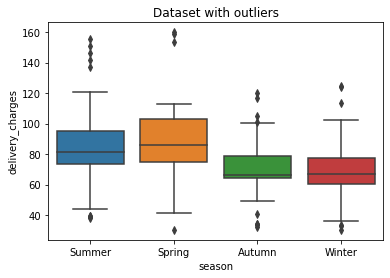

In [44]:
sns.boxplot(y='delivery_charges', x='season', data=df_outlier).set_title('Dataset with outliers')

Number of outliers for Summer is: 9
Number of outliers for Autumn is: 9
Number of outliers for Winter is: 6
Number of outliers for Spring is: 4


Text(0.5, 1.0, 'Dataset without outliers')

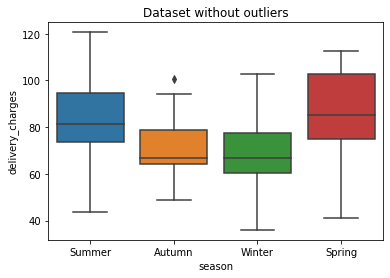

In [45]:
df_list = []
for i in seasons:
    global df_list
    season_df = df_outlier[df_outlier['season'] == i]
    size_befor = season_df.shape
#     print(season_df.shape)
    Q1 = season_df['delivery_charges'].quantile(0.25)
    Q3 = season_df['delivery_charges'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 


    lower_inner_fence= Q1 - 1.5 * IQR
    upper_inner_fence= Q3 + 1.5 * IQR
    
    filter = (season_df['delivery_charges'] >= lower_inner_fence) & (season_df['delivery_charges'] <= upper_inner_fence)
#     # taking only that rows that are withing boundray
    frame = season_df.loc[filter]
    size_after = frame.shape
    df_list.append(frame)
    final_df = pd.concat(df_list)
    print('Number of outliers for '+i+' is: '+str(size_befor[0] - size_after[0]))
    
#     print(season_df.loc[filter].shape)
#     result = pd.concat(frame)

sns.boxplot(y='delivery_charges', x='season', data=final_df).set_title('Dataset without outliers')


- After calling the above fucntions we can see that all the outlires values are removed and we got the desire output.
- Writing the proper data into `30145945_outlier_data_solution.csv` file

In [46]:
final_df.to_csv('/Users/shubhamsingh/Documents/30145945_ass2/30145945_outlier_data_solution.csv',index=False)

### Referances
- https://stackoverflow.com/questions/25597196/selecting-rows-of-a-dataframe-based-on-two-conditions-in-pandas-python
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule
- https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
- https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c
- https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/linear-algebra-scipy/
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://www.youtube.com/watch?v=HYcXgN9HaTM